<a href="https://colab.research.google.com/github/PhilipMachineLearning/Food100_YOLO_Tools/blob/master/v4_Food_Detection_Google_Colob_Yolo_Darknet_Video_Without_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run YOLO V3 on Colab for images/videos
<br>


In [1]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb	 data
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1  food100.data
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.2  sample_data
darknet
Cloning into 'darknet'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 10240 (delta 12), reused 21 (delta 10), pack-reused 10201
Receiving objects: 100% (10240/10240), 10.18 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (6866/6866), done.


In [2]:
!ls
%cd darknet
!ls
% cd ..

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb	 data
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.1  food100.data
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb.2  sample_data
darknet
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
/content


In [3]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2019-06-04 21:40:48--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7Ntqtu7g8JberSJYtPWvebjFIW37mrEXuhGKG-9mdgtXJcbVoHfEkZdB2Y56yo7gmMZ_wjE2Mcs-jCmRsNqXsh0XmtCovYIpMiJRJCLDfVTlZAbCv1G-Y1hRij7abT3Jy05dS6DiK6hDS1owrSPxSiqCfNw7-oPUjkRbs8ZcTXvKgMRTxw3Yk5NsVae0JeqHpD9pZeT0o0bmDquOzKfdCykqNw [following]
--2019-06-04 21:40:48--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7Ntqtu7g8JberSJYtPWvebjFIW37mrEXuhGKG-9mdgtXJcbVoHfEkZdB2Y56yo7gmMZ_wjE2Mcs-jCmRsNqXsh0XmtCo

In [4]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Ign:15 https://cloud.r-project.org/bin

In [5]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda-8-0 is already the newest version (8.0.61-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [7]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++-5 is already the newest version (5.5.0-12ubuntu1).
gcc-5 is already the newest version (5.5.0-12ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [8]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

ln: failed to create symbolic link '/usr/local/cuda/bin/gcc': File exists
ln: failed to create symbolic link '/usr/local/cuda/bin/g++': File exists


In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [10]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [11]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla P40, Tesl

In [12]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [13]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope:
./src/image_opencv.cpp:420:14: warning: ‘float get_pixel(image, int, int, int)’ defined but not used [-Wunused-function]
 static float get_pixel(image m, int x, int y, int c)
              ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unkn

In [15]:
# Downloading YOLO weights
#!wget https://pjreddie.com/media/files/yolov3.weights
# SWITCHING TO yolov2 weights
!wget https://pjreddie.com/media/files/yolov2.weights

--2019-06-04 21:43:02--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  13.0MB/s    in 7.5s    

2019-06-04 21:43:10 (26.1 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [17]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
#!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
!./darknet detect cfg/yolov2.cfg yolov2.weights data/dog.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32 0.006 BF
   2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64 0.003 BF
   4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
   9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
  11 max          2 x 2 / 2    52 x  52 x 256   ->    26 x  26 x 256 0.001 

In [18]:
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     README.md
appveyor.yml  CMakeSettings.json      include		     results
backup	      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj		     yolov2.weights
cmake	      image_yolov2.sh	      predictions.jpg


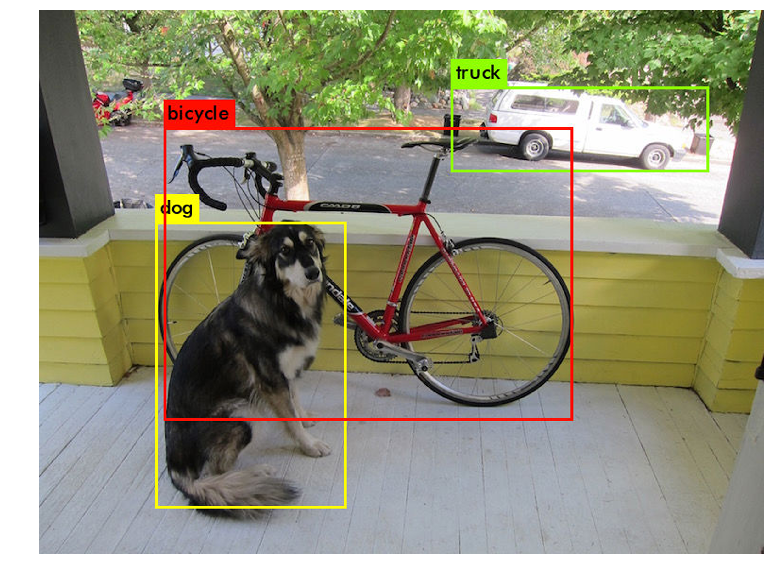

In [19]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()




In [20]:
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     README.md
appveyor.yml  CMakeSettings.json      include		     results
backup	      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj		     yolov2.weights
cmake	      image_yolov2.sh	      predictions.jpg


In [21]:
!pwd

/content/darknet


In [0]:
rm -r Food100_YOLO_Tools

In [73]:
!git clone https://github.com/PhilipMachineLearning/Food100_YOLO_Tools.git

Cloning into 'Food100_YOLO_Tools'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 96 (delta 27), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (96/96), done.


In [74]:
!wget http://foodcam.mobi/dataset100.zip

--2019-06-04 22:13:58--  http://foodcam.mobi/dataset100.zip
Resolving foodcam.mobi (foodcam.mobi)... 130.153.192.238
Connecting to foodcam.mobi (foodcam.mobi)|130.153.192.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 991355222 (945M) [application/zip]
Saving to: ‘dataset100.zip.5’

dataset100.zip.5    100%[===================>] 945.43M  28.7MB/s    in 35s     

2019-06-04 22:14:34 (27.4 MB/s) - ‘dataset100.zip.5’ saved [991355222/991355222]



In [75]:
!unzip dataset100.zip

Archive:  dataset100.zip
   creating: UECFOOD100/
   creating: UECFOOD100/97/
  inflating: UECFOOD100/97/13522.jpg  
  inflating: UECFOOD100/97/15647.jpg  
  inflating: UECFOOD100/97/13502.jpg  
  inflating: UECFOOD100/97/13505.jpg  
  inflating: UECFOOD100/97/13564.jpg  
  inflating: UECFOOD100/97/13537.jpg  
  inflating: UECFOOD100/97/13536.jpg  
  inflating: UECFOOD100/97/14964.jpg  
  inflating: UECFOOD100/97/13496.jpg  
  inflating: UECFOOD100/97/13566.jpg  
  inflating: UECFOOD100/97/13547.jpg  
  inflating: UECFOOD100/97/13554.jpg  
  inflating: UECFOOD100/97/13521.jpg  
  inflating: UECFOOD100/97/13563.jpg  
  inflating: UECFOOD100/97/13550.jpg  
  inflating: UECFOOD100/97/13551.jpg  
  inflating: UECFOOD100/97/14962.jpg  
  inflating: UECFOOD100/97/13497.jpg  
  inflating: UECFOOD100/97/13959.jpg  
  inflating: UECFOOD100/97/13510.jpg  
  inflating: UECFOOD100/97/14955.jpg  
  inflating: UECFOOD100/97/13560.jpg  
  inflating: UECFOOD100/97/13541.jpg  
  inflating: UECFOOD100/9

In [0]:
!mv UECFOOD100/ Food100_YOLO_Tools/

In [0]:
!mv Food100_YOLO_Tools/UECFOOD100 Food100_YOLO_Tools/images

In [0]:
#!cp -r data/food100 ./

In [0]:
#!mv food100 Food100_YOLO_Tools/images

In [80]:
!python Food100_YOLO_Tools/food100_generate_bbox_file.py

datapath: /content/darknet/Food100_YOLO_Tools/images
labelpath: /content/darknet/data/labels
classfilename: /content/darknet/Food100_YOLO_Tools/food100.names
Class file name: /content/darknet/Food100_YOLO_Tools/food100.names
generating 1 rice
Entering method: generate bbox file
Label directory path: /content/darknet/data/labels/1
Path does not exist
Creating label directory: /content/darknet/data/labels/1
img_bbox_filename: /content/darknet/Food100_YOLO_Tools/images/1/1.txt
Current yolo_label_filename: /content/darknet/data/labels/1/1.txt
img_bbox_filename: /content/darknet/Food100_YOLO_Tools/images/1/2.txt
Current yolo_label_filename: /content/darknet/data/labels/1/2.txt
img_bbox_filename: /content/darknet/Food100_YOLO_Tools/images/1/3.txt
Current yolo_label_filename: /content/darknet/data/labels/1/3.txt
img_bbox_filename: /content/darknet/Food100_YOLO_Tools/images/1/4.txt
Current yolo_label_filename: /content/darknet/data/labels/1/4.txt
img_bbox_filename: /content/darknet/Food100_YOL

In [0]:
#!apt-get install python-tk

In [82]:
!python Food100_YOLO_Tools/food100_split_for_yolo.py

file_train path: <_io.TextIOWrapper name='/content/darknet/Food100_YOLO_Tools/train.txt' mode='w' encoding='UTF-8'>
file_train path: <_io.TextIOWrapper name='/content/darknet/Food100_YOLO_Tools/test.txt' mode='w' encoding='UTF-8'>
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5433.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5468.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5449.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/16217.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5478.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5435.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/14594.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/14574.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/14619.jpg
Path and File name: /content/darknet/Food100_YOLO_Tools/images/54/5401.jpg
Path and File n

In [0]:
# This command does not work in Google colab
# Error: no display name and no $DISPLAY environment variable
# Stack overflow: https://stackoverflow.com/questions/49478228/tclerror-no-display-name-and-no-display-environment-variable-in-googles-colab
#!python Food100_YOLO_Tools/food100_tk_label_bbox.py

In [84]:
!pwd

/content/darknet


In [85]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2019-06-04 22:15:35--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23.1’

darknet19_448.conv. 100%[===================>]  75.65M  10.4MB/s    in 5.9s    

2019-06-04 22:15:41 (12.9 MB/s) - ‘darknet19_448.conv.23.1’ saved [79327120/79327120]



In [87]:
!./darknet detector train /content/darknet/Food100_YOLO_Tools/food100.data /content/darknet/Food100_YOLO_Tools/yolov2-food100.cfg darknet19_448.conv.23 -dont_show

yolov2-food100
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32 0.006 BF
   2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64 0.003 BF
   4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
   9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256 1.595 BF
  11 max          2 x 2 / 2    52 x  52 x 256   ->    26 x  

In [0]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd 
%cd darknet
!ls
%cd data
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)


/content
/content/darknet
3rdparty  darknet.py	   Makefile	    README.md	 video_yolov3.sh
backup	  data		   mjpeg_stream.sh  results	 yolov3.weights
build	  image_yolov2.sh  net_cam_v3.sh    scripts
cfg	  image_yolov3.sh  obj		    src
darknet   LICENSE	   predictions.jpg  video_v2.sh
/content/darknet/data


Saving cut.mp4 to cut.mp4
saved file cut.mp4


In [0]:
# And finally run it! Please check if you have given the right video file name
%cd 
%cd darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/cut.mp4 -i 0 -out_filename res.avi
 

/content
/content/darknet
Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->   


FPS:15.2
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 29% 

 cvWriteFrame 

 cvWriteFrame 

FPS:13.3
Objects:

sports ball: 97% 
person: 100% 
person: 100% 
person: 99% 
person: 83% 
person: 26% 

 cvWriteFrame 

FPS:15.0
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 92% 
person: 88% 

 cvWriteFrame 

FPS:14.0
Objects:

sports ball: 99% 
person: 100% 
person: 100% 
person: 98% 
person: 86% 
person: 46% 

 cvWriteFrame 

FPS:14.9
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 94% 
person: 73% 
person: 42% 

 cvWriteFrame 

FPS:14.6
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 67% 

 cvWriteFrame 

FPS:14.8
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 67% 

 cvWriteFrame 

FPS:15.1
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 92% 

 cvWriteFrame 

FPS:15.3
Objects:

sports ball: 100% 
person: 99% 
person: 99% 
person: 91% 


 cvWriteFrame 

FPS:14.5
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 38% 

 cvWriteFrame 

FPS:14.7
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 98% 
person: 37% 

 cvWriteFrame 

FPS:12.6
Objects:

sports ball: 99% 
person: 100% 
person: 100% 
person: 97% 
person: 95% 
person: 85% 

 cvWriteFrame 

FPS:13.6
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 96% 
person: 94% 
person: 43% 

 cvWriteFrame 

FPS:13.8
Objects:

sports ball: 100% 
person: 100% 
person: 100% 
person: 99% 
person: 89% 

 cvWriteFrame 

FPS:13.0
Objects:

sports ball: 100% 
person: 100% 
person: 99% 
person: 94% 
person: 79% 
person: 47% 
person: 42% 
person: 37% 

 cvWriteFrame 

FPS:14.1
Objects:

sports ball: 100% 
person: 99% 
person: 98% 
person: 93% 
person: 90% 

 cvWriteFrame 

FPS:15.0
Objects:

sports ball: 100% 
person: 99% 
person: 98% 
person: 92% 
person: 91% 
person: 26% 

 cvWriteFrame 

FPS:14.7
Obje


 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 86% 
person: 53% 
person: 47% 
person: 42% 
person: 36% 
person: 34% 

 cvWriteFrame 

FPS:14.0
Objects:

person: 100% 
person: 99% 
person: 99% 
person: 97% 
person: 86% 
person: 53% 
person: 48% 
person: 41% 
person: 36% 
person: 33% 

 cvWriteFrame 

FPS:11.4
Objects:

sports ball: 80% 
person: 100% 
person: 100% 
person: 99% 
person: 83% 
person: 82% 
person: 81% 
person: 72% 
person: 37% 
person: 33% 
person: 31% 
person: 28% 

FPS:13.1
Objects:

sports ball: 39% 
person: 100% 
person: 100% 
person: 99% 
person: 93% 
person: 86% 

 cvWriteFrame 
person: 81% 
person: 69% 
person: 44% 
person: 31% 
person: 28% 

 cvWriteFrame 

FPS:13.1
Objects:

sports ball: 54% 
person: 100% 
person: 99% 
person: 99% 
person: 91% 
person: 83% 
person: 66% 
person: 64% 
person: 61% 
person: 60% 
person: 51% 
person: 32% 
person: 32% 
person: 29% 

 cvWriteFrame 

FPS:13.4
Objects:

sports ball: 50% 
per


 cvWriteFrame 

FPS:13.6
Objects:

sports ball: 81% 
person: 100% 
person: 100% 
person: 54% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 100% 
person: 47% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 100% 
person: 99% 
person: 43% 
person: 35% 

 cvWriteFrame 

FPS:13.0
Objects:

person: 100% 
person: 100% 
person: 40% 

 cvWriteFrame 

FPS:13.9
Objects:

person: 100% 
person: 100% 

FPS:14.8
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.6
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

 cvWriteFrame 

FPS:14.5
Objects:

person: 100% 
person: 100% 

 cvWriteFrame 

FPS:13.4
Objects:

person: 100% 
person: 99% 
person: 37% 

 cvWriteFrame 

FPS:15.0
Objects:

person: 100% 
person: 99% 

 cvWriteFrame 

FPS:11.7
Objects:

person: 100% 
person: 98% 
person: 36% 
person: 27% 

 cvWriteFrame 

FPS:14.6
Objects:

person: 100% 
person: 98% 
person: 34% 
person: 27% 

 cvWriteFrame 

FPS:15.1
Objects:

person: 100% 
person: 97% 
person: 29% 

 cvWriteFram

In [0]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')


total 273648
drwxr-xr-x 13 root root      4096 May 29 10:17 .
drwxr-xr-x  1 root root      4096 May 29 10:01 ..
drwxr-xr-x  5 root root      4096 May 29 09:51 3rdparty
drwxr-xr-x  2 root root      4096 May 29 09:59 backup
drwxr-xr-x  3 root root      4096 May 29 09:51 build
drwxr-xr-x  3 root root      4096 May 29 09:51 cfg
drwxr-xr-x  2 root root      4096 May 29 09:51 .circleci
-rwxr-xr-x  1 root root   2123672 May 29 10:00 darknet
-rw-r--r--  1 root root     15417 May 29 09:51 darknet.py
drwxr-xr-x  3 root root      4096 May 29 10:06 data
drwxr-xr-x  8 root root      4096 May 29 09:51 .git
-rw-r--r--  1 root root       233 May 29 09:51 .gitignore
-rw-r--r--  1 root root       108 May 29 09:51 image_yolov2.sh
-rw-r--r--  1 root root       110 May 29 09:51 image_yolov3.sh
-rw-r--r--  1 root root       515 May 29 09:51 LICENSE
-rw-r--r--  1 root root      4247 May 29 09:59 Makefile
-rw-r--r--  1 root root       245 May 29 09:51 mjpeg_stream.sh
-rw-r--r--  1 root root       160 May 29 0

# Here is a sample output:
https://www.youtube.com/watch?v=u0gxK6k1agM&feature=youtu.be



